In [36]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
df = pd.read_json("/content/labeled_data.json")

In [38]:
df

,username,rating,comment,product_name,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,tmngc497,3,Màu sắc:đúng\nĐúng với mô tả:đúng\nChất liệu:k...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,2,No Spam,1,27,2024-04-13 17:24:52.750878+00:00,2024-04-14 12:07:39.351720+00:00,74.740
1,cangtrn164,5,Màu sắc:đen trắng\nĐúng với mô tả:đúng\nChất l...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,3,Spam,1,29,2024-04-14 12:07:49.594771+00:00,2024-04-14 12:07:49.594771+00:00,8.235
2,d5xsyl2tic,5,Chất liệu:vài\nĐúng với mô tả:đúng\nMàu sắc:đú...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,4,Spam,1,28,2024-04-14 12:07:25.786929+00:00,2024-04-14 12:07:25.786929+00:00,3.288
3,huyduc511,5,Màu sắc:10₫\nĐúng với mô tả:10₫\nChất liệu:2 t...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,5,Spam,1,30,2024-04-14 12:07:57.194759+00:00,2024-04-14 12:07:57.194759+00:00,5.699
4,thanh.phuc1,5,....hàng tốt ngon xài ok hơi dễ bẩn,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,6,No Spam,1,31,2024-04-14 12:08:29.692419+00:00,2024-04-14 12:08:29.692419+00:00,4.296
...,...,...,...,...,...,...,...,...,...,...,...
5927,iarp_l3svp,5,tốt,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5929,Spam,1,1363,2024-04-14 15:58:25.470553+00:00,2024-04-14 15:58:25.470553+00:00,1.452
5928,r679kep4wr,5,Hay quá,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5930,No Spam,1,4751,2024-04-15 08:12:23.729645+00:00,2024-04-15 08:12:23.729645+00:00,1.327
5929,s0szq85vlr,5,Bay tốt,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5931,No Spam,1,2075,2024-04-14 17:38:45.696225+00:00,2024-04-14 17:38:45.696225+00:00,1.363
5930,tranducthien951982,5,Ok,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5932,Spam,1,3828,2024-04-15 04:08:36.056098+00:00,2024-04-15 04:08:36.056098+00:00,1.274


In [39]:
# Convert the sentiment collumn into
df['label'] = df['sentiment'].map({
    'Spam' : 1,
    'No Spam' : 0
})

In [40]:
df

,username,rating,comment,product_name,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time,label
0,tmngc497,3,Màu sắc:đúng\nĐúng với mô tả:đúng\nChất liệu:k...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,2,No Spam,1,27,2024-04-13 17:24:52.750878+00:00,2024-04-14 12:07:39.351720+00:00,74.740,0.0
1,cangtrn164,5,Màu sắc:đen trắng\nĐúng với mô tả:đúng\nChất l...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,3,Spam,1,29,2024-04-14 12:07:49.594771+00:00,2024-04-14 12:07:49.594771+00:00,8.235,1.0
2,d5xsyl2tic,5,Chất liệu:vài\nĐúng với mô tả:đúng\nMàu sắc:đú...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,4,Spam,1,28,2024-04-14 12:07:25.786929+00:00,2024-04-14 12:07:25.786929+00:00,3.288,1.0
3,huyduc511,5,Màu sắc:10₫\nĐúng với mô tả:10₫\nChất liệu:2 t...,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,5,Spam,1,30,2024-04-14 12:07:57.194759+00:00,2024-04-14 12:07:57.194759+00:00,5.699,1.0
4,thanh.phuc1,5,....hàng tốt ngon xài ok hơi dễ bẩn,Mũ Beanie Giả Tóc Giả Hóa Trang Halloween Họa ...,6,No Spam,1,31,2024-04-14 12:08:29.692419+00:00,2024-04-14 12:08:29.692419+00:00,4.296,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5927,iarp_l3svp,5,tốt,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5929,Spam,1,1363,2024-04-14 15:58:25.470553+00:00,2024-04-14 15:58:25.470553+00:00,1.452,1.0
5928,r679kep4wr,5,Hay quá,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5930,No Spam,1,4751,2024-04-15 08:12:23.729645+00:00,2024-04-15 08:12:23.729645+00:00,1.327,0.0
5929,s0szq85vlr,5,Bay tốt,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5931,No Spam,1,2075,2024-04-14 17:38:45.696225+00:00,2024-04-14 17:38:45.696225+00:00,1.363,0.0
5930,tranducthien951982,5,Ok,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5932,Spam,1,3828,2024-04-15 04:08:36.056098+00:00,2024-04-15 04:08:36.056098+00:00,1.274,1.0


In [41]:
df.isnull().sum()

username          0
rating            0
comment           0
product_name      0
id                0
sentiment        43
annotator         0
annotation_id     0
created_at        0
updated_at        0
lead_time         0
label            43
dtype: int64

In [42]:
df = df.dropna(subset=['label'])

<FreqDist with 2 samples and 5889 outcomes>


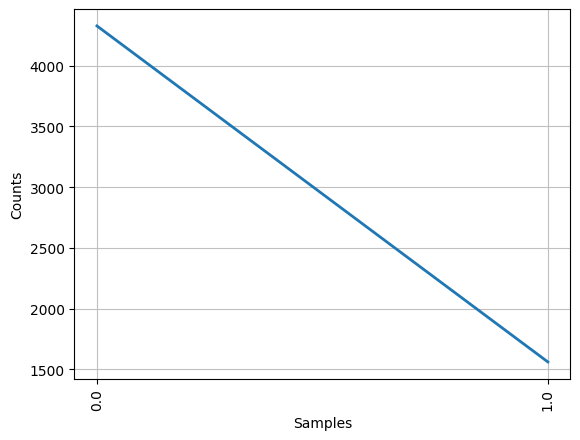

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:
# Visualizing the frequency distribution of the labels
fdist = FreqDist(df.label)
print(fdist)
fdist.plot(3)

In [44]:
# Analyzing the frequency distribution of 20 words in the given data
def stat_and_tail_stat(data):
    new_data = []
    for review in data:
        review = review.split()
        new_data.extend(review)

    # Stat
    fdist = FreqDist(new_data)
    print("Stat:")
    print(fdist)
    fdist.plot(20)

    # Tail_stat
    a = fdist.hapaxes()
    fdist2 = FreqDist(a)
    print("Tail Stat:")
    print(fdist2)
    fdist2.plot(20)

Stat:
<FreqDist with 12708 samples and 122687 outcomes>


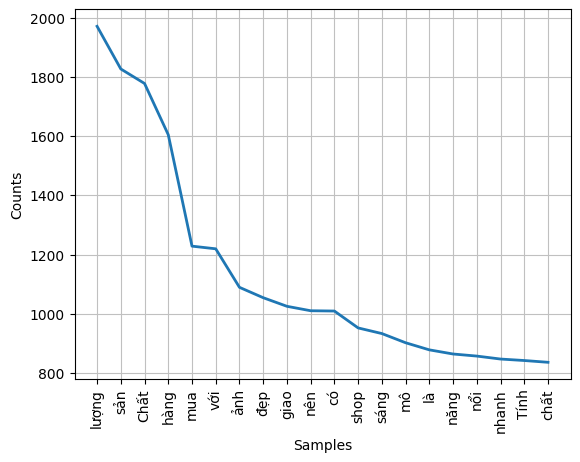

Tail Stat:
<FreqDist with 7895 samples and 7895 outcomes>


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129298 (\N{FACE WITH THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


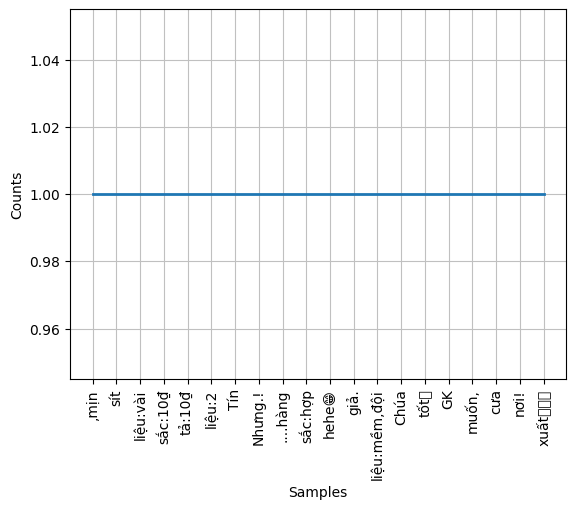

In [45]:
stat_and_tail_stat(df.comment)

# <b>PREPROCESSING

In [46]:
# Reading a list of Vietnamese stopwords
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    vietnamese_stopwords = file.readlines()
vietnamese_stopwords = [word.strip() for word in vietnamese_stopwords]

In [47]:
# Dictionary of common teencode and their correct forms
teencode_dict = {
        'chx': 'chưa',
        'z': 'vậy',
        'd': 'vậy',
        'k': 'không',
        'hok': 'không',
        'ko': 'không',
        'kh': 'không',
        'cx': 'cũng',
        'đỉm': 'điểm',
        'oce': 'ok',
        'oke': 'ok',
        'đc': 'được',
        'ns': 'nói',
        'tc': 'tính chất',
        'tch': 'tính chất',
        'tks': 'cảm ơn',
        'nc': 'nói chuyện',
        'thui': 'thôi',
        'ha': 'hình ảnh',
        'ik': 'đi',
        'auce': 'ok',
        'xink': 'xinh',
        'dth': 'dễ thương',
        'dthw': 'dễ thương',
        'nhe':'nha',
        'nthe': 'như thế',
        'dethun': 'dễ thương',
        'kcj': 'không có gì',
        'kcgi': 'không có gì',
        'ntn': 'như thế này',
        'ng': 'người',
        'mn': 'mọi người',
        'ng': 'mọi người',
        'nma': 'nhưng mà',
        'qlai': 'quay lại',
        'sp': 'sản phẩm',
        'tn': 'tin nhắn',
        'qtam': 'quan tâm',
        'th': 'thôi',
        'nch': 'nói chung',
        'mk': 'mình'
        # Add more teencode mappings as needed
}

In [48]:
# Cleaning data
def transform_text(text):
    # Remove unwanted characters using regex
    text = re.sub(r'[^a-zA-ZÀ-Ỹà-ỹ\s]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Reduce repetitive characters to two occurrences
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Split text into words
    text = text.split()

    # Replace teencode with correct words
    text = [teencode_dict.get(word, word) for word in text]

    # Apply stemming and remove Vietnamese stopwords
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if word not in vietnamese_stopwords]

    # Join processed words back into a string
    text = " ".join(text)

    return text

In [49]:
# Compare data before and after preprocessing
print('Data before preprocessing')
print(df.comment[121])
print('===========================================================================')
print('Data after preprocessing')
print(transform_text(df.comment[121]))

Data before preprocessing
Giao hàng nhanh, đóng gói cẩn thận, rất ưng ý, sẽ tiếp tục ủng hộ shop👍
Data after preprocessing
giao nhanh đóng gói cẩn thận rất ưng ý sẽ tiếp tục ủng hộ shop


In [50]:
processed_reviews = df.comment.apply(transform_text)

Stat:
<FreqDist with 5993 samples and 108513 outcomes>


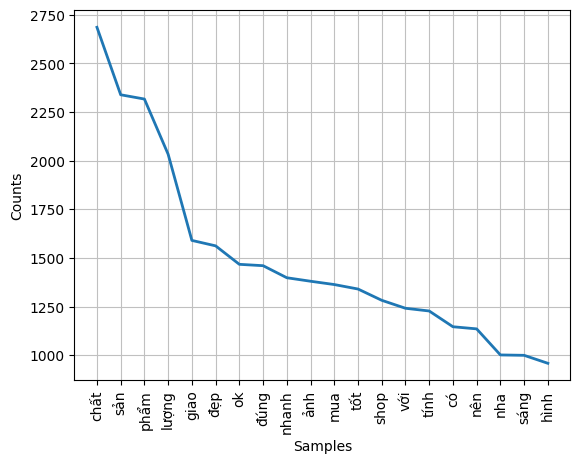

Tail Stat:
<FreqDist with 3073 samples and 3073 outcomes>


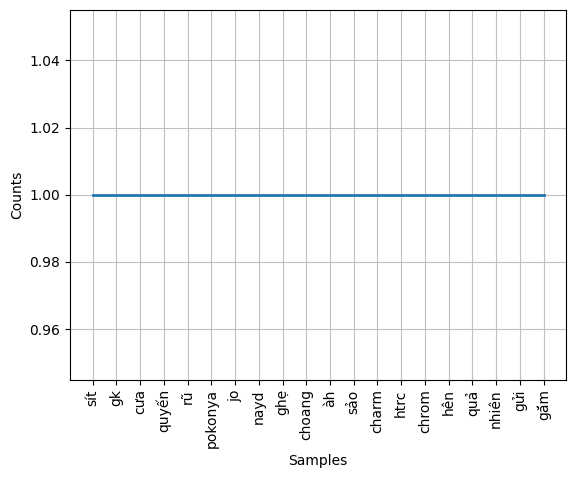

In [51]:
# Frequency distribution of the 20 most frequent words and 20 rare words
stat_and_tail_stat(processed_reviews)

In [52]:
# Convert to vecto
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(processed_reviews).toarray()
#X = X.todense()

In [53]:
X.shape

(5889, 5770)

In [54]:
# Parameter adjustment
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(processed_reviews).toarray()
#X = X.todense()

In [55]:
X.shape

(5889, 2000)

# <b>BUILDING MODEL

In [56]:
# from sklearn.model_selection import train_test_split

# Define labels Y
# Y = df['label'].values

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [57]:
# mnb = MultinomialNB()
# mnb.fit(X_train, y_train)
# y_predict1 = mnb.predict(X_test)
# score_1 = mnb.score(X_train, y_train)
# score_1

In [58]:
# lr = LogisticRegression(random_state=0)
# lr.fit(X_train, y_train)
# y_predict2 = lr.predict(X_test)
# score_2 = lr.score(X_train, y_train)
# score_2

In [59]:
# Define labels Y
Y = df['label'].values

# Initialize Stratified Shuffle Split with splits = 10
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Initialize variables to track best scores and corresponding train/test indices
maxscore_1 = 0
maxscore_2 = 0
maxscore_3 = 0
trainset1 = []
testset1 = []
trainset2 = []
testset2 = []
trainset3 = []
testset3 = []

# Iterate through each split
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Model 1: Logistic Regression
    model_1 = LogisticRegression(random_state=0)
    model_1.fit(X_train, Y_train)

    # Model 2: Support Vector Machine
    model_2 = SVC(kernel='linear')
    model_2.fit(X_train, Y_train)


    # Model 3: Multinomial Naive Bayes
    model_3 = MultinomialNB()
    model_3.fit(X_train, Y_train)

    # Accuracy scores of each models
    score_1 = model_1.score(X_test, Y_test)
    score_2 = model_2.score(X_test, Y_test)
    score_3 = model_3.score(X_test, Y_test)


    # Update max scores and corresponding train/test indices
    if maxscore_1 < score_1:
        maxscore_1 = score_1
        trainset1 = train_index
        testset1 = test_index
    if maxscore_2 < score_2:
        maxscore_2 = score_2
        trainset2 = train_index
        testset2 = test_index
    if maxscore_3 < score_3:
        maxscore_3 = score_3
        trainset3 = train_index
        testset3 = test_index

    # Print scores for each model
    print("Logistic")
    print("Train score:", model_1.score(X_train, Y_train))
    print("Test score:", score_1)

    print("Support Vector Machine")
    print("Train score:",  model_2.score(X_train, Y_train))
    print("Test score:", score_2)

    print("MultinomialNB")
    print("Train score:",  model_3.score(X_train, Y_train))
    print("Test score:", score_3)
    print("===============")


Logistic
Train score: 0.9002334960730206
Test score: 0.8777589134125636
Support Vector Machine
Train score: 0.914243260454256
Test score: 0.8879456706281834
MultinomialNB
Train score: 0.8582042029293143
Test score: 0.8471986417657046
Logistic
Train score: 0.904691148376141
Test score: 0.8837011884550084
Support Vector Machine
Train score: 0.9148800679261303
Test score: 0.8828522920203735
MultinomialNB
Train score: 0.85756739545744
Test score: 0.8514431239388794
Logistic
Train score: 0.9004457652303121
Test score: 0.8760611205432938
Support Vector Machine
Train score: 0.9121205688813415
Test score: 0.8769100169779287
MultinomialNB
Train score: 0.8632986627043091
Test score: 0.8259762308998302
Logistic
Train score: 0.9070261091063468
Test score: 0.8735144312393888
Support Vector Machine
Train score: 0.9165782211844619
Test score: 0.8828522920203735
MultinomialNB
Train score: 0.8558692421991084
Test score: 0.8429541595925297
Logistic
Train score: 0.9049034175334324
Test score: 0.885398981

In [60]:
# LogisticRegression
X_train1, X_test1= X[trainset1], X[testset1]
Y_train1, Y_test1= Y[trainset1], Y[testset1]

# SVC
X_train2, X_test2= X[trainset2], X[testset2]
Y_train2, Y_test2= Y[trainset2], Y[testset2]

# MultinomialNB
X_train3, X_test3= X[trainset3], X[testset3]
Y_train3, Y_test3= Y[trainset3], Y[testset3]

# Building Model
model_1 = LogisticRegression(random_state=0)
model_1.fit(np.asarray(X_train1), Y_train1)
model_2 = SVC(kernel='linear')
model_2.fit(np.asarray(X_train2), Y_train2)
model_3 = MultinomialNB()
model_3.fit(np.asarray(X_train3), Y_train3)

MultinomialNB()

In [61]:
# AccuracyScore
print("Logistic")
print(model_1.score(np.asarray(X_test1), Y_test1))
print("Support Vector Machine")
print(model_2.score(np.asarray(X_test2), Y_test2))
print("MultinomialNB")
print(model_3.score(np.asarray(X_test3), Y_test3))

Logistic
0.8921901528013583
Support Vector Machine
0.8955857385398981
MultinomialNB
0.8514431239388794


In [62]:
user_input = input('Enter a review:')
user_input_vectorized = tfidf.transform([user_input]).toarray()
prediction = model_2.predict(user_input_vectorized)[0]
prediction
if prediction == 1:
    print('Spam')
else:
    print('Not spam')

Enter a review:cảm ơn bạn
Spam


In [63]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model_2, open('model.pkl','wb'))